In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import fitsio
import matplotlib.pyplot as plt
import healpy as hp
import glob
import hpgeom
import numpy as np
import galsim

from sim_match_tools import project_to_tile, sample_from_pixel

## Plot a Sim and Test Rotations

In [3]:
fnames = glob.glob("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.*.fits")

In [4]:
fnames[0]

'/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.118.fits'

In [5]:
d = fitsio.read(fnames[0])

In [6]:
d.dtype.names

('PX',
 'PY',
 'PZ',
 'VX',
 'VY',
 'VZ',
 'Z_COS',
 'Z',
 'MAG_R',
 'DIST8',
 'M200',
 'R200',
 'RHALO',
 'HALOID',
 'CENTRAL',
 'BAD_ASSIGN',
 'SIGMA5',
 'PSIGMA5',
 'SEDID',
 'MAG_R_EVOL',
 'TMAG',
 'AMAG',
 'TSIZE',
 'TE',
 'EPSILON_IA',
 'COMOVING_SIZE',
 'ID',
 'TRA',
 'TDEC',
 'EPSILON',
 'SIZE',
 'KAPPA',
 'MU',
 'W',
 'GAMMA1',
 'GAMMA2',
 'DEC',
 'RA',
 'LMAG',
 'OMAG',
 'OMAGERR',
 'FLUX',
 'IVAR')

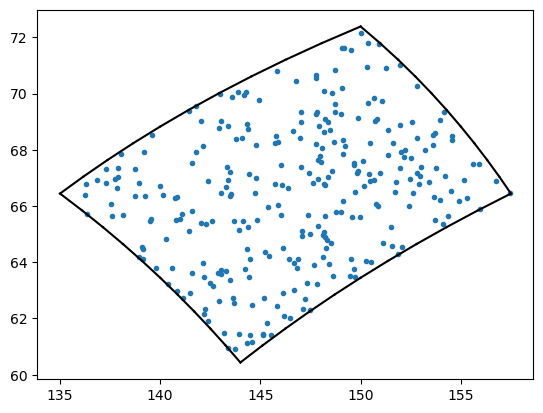

In [7]:
nside = 8
pix = int(fnames[0].split(".")[-2])

fig, axs = plt.subplots()

msk = d["AMAG"][:, 2] < -23.75

axs.plot(d["TRA"][msk], d["TDEC"][msk], ".")

rab, decb = hpgeom.boundaries(
    nside,
    pix,
    nest=True,
    step=10,
)

for i in range(rab.shape[0]):
    ip1 = (i+1) % rab.shape[0]
    axs.plot(
        [rab[i], rab[ip1]],
        [decb[i], decb[ip1]], 
        color="k",
    )

In [8]:
import yaml

with open(
    "/global/cfs/cdirs/desbalro/des-pizza-slices-y6/pizza_cutter_info/"
    "DES0000-0250_g_pizza_cutter_info.yaml", 
    "r",
) as fp:
    info = yaml.safe_load(fp)

In [9]:
wcs = galsim.FitsWCS(info["image_path"], hdu=1)

In [10]:
rac, decc = hpgeom.pixel_to_angle(nside, pix)

new_ra, new_dec = project_to_tile(
    d["TRA"][msk],
    d["TDEC"][msk],
    rac,
    decc,
    wcs,
)

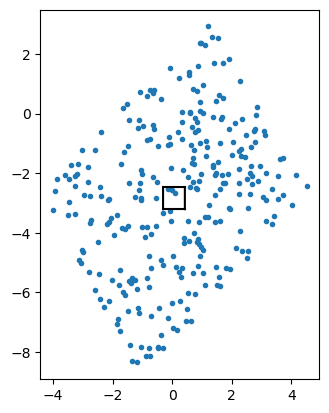

In [11]:
fig, axs = plt.subplots()

axs.set_aspect("equal")
axs.plot(new_ra, new_dec, ".")

xv = np.array([1, 1, 10000, 10000])
yv = np.array([1, 10000, 10000, 1])

rav, decv = wcs.xyToradec(xv, yv, units=galsim.degrees)

for i in range(rav.shape[0]):
    ip1 = (i+1) % rav.shape[0]
    axs.plot(
        [rav[i], rav[ip1]],
        [decv[i], decv[ip1]],
        "-k",
    )
        

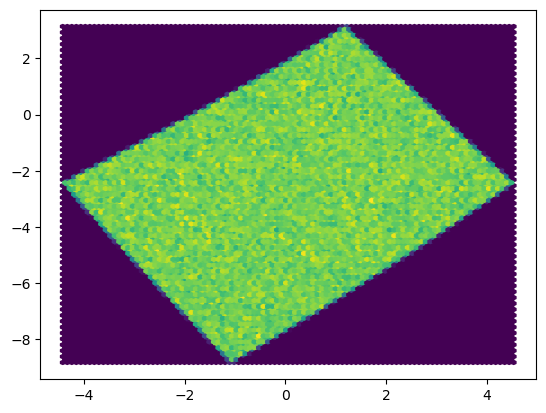

In [13]:
fig, axs = plt.subplots()

ra, dec = sample_from_pixel(nside, pix, size=1000000)

rac, decc = hpgeom.pixel_to_angle(nside, pix)

new_ra, new_dec = project_to_tile(
    ra,
    dec,
    rac,
    decc,
    wcs,
)
axs.hexbin(new_ra, new_dec, bins=100)

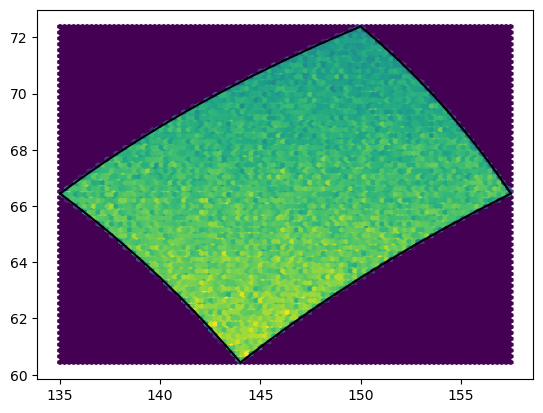

In [14]:
fig, axs = plt.subplots()

ra, dec = sample_from_pixel(nside, pix, size=1000000)

axs.hexbin(ra, dec, bins=100)

rab, decb = hpgeom.boundaries(
    nside,
    pix,
    nest=True,
    step=10,
)

for i in range(rab.shape[0]):
    ip1 = (i+1) % rab.shape[0]
    axs.plot(
        [rab[i], rab[ip1]],
        [decb[i], decb[ip1]], 
        color="k",
    )

## Now Try to Sample and Match a Cosmos "insta" Catalog

In [75]:
d = fitsio.read(fnames[0])

In [16]:
# catalog_sampler:
#   file_name: /dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits
#   cuts:
#     mag_i: [15., 25.]  # use only 15<mag_i<25. for now.
#     isgal: [1,]  # select galaxies only since we're simulating stars separately.
#     mask_flags: [0,]  # apply mask flags
#     bdf_hlr: [0., 5.]
cosmos = fitsio.read("/dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits")

In [28]:
cosmos.dtype.names

('des_id',
 'bdf_hlr',
 'bdf_fracdev',
 'mask_flags',
 'bdf_g1',
 'bdf_g2',
 'flux_u',
 'flux_g',
 'flux_r',
 'flux_i',
 'flux_z',
 'flux_Y',
 'flux_J',
 'flux_H',
 'flux_Ks',
 'mag_u',
 'mag_g',
 'mag_r',
 'mag_i',
 'mag_z',
 'mag_Y',
 'mag_J',
 'mag_H',
 'mag_Ks',
 'flux_u_dered',
 'flux_g_dered',
 'flux_r_dered',
 'flux_i_dered',
 'flux_z_dered',
 'flux_Y_dered',
 'flux_J_dered',
 'flux_H_dered',
 'flux_Ks_dered',
 'mag_u_dered',
 'mag_g_dered',
 'mag_r_dered',
 'mag_i_dered',
 'mag_z_dered',
 'mag_Y_dered',
 'mag_J_dered',
 'mag_H_dered',
 'mag_Ks_dered',
 'laigle_number',
 'photoz',
 'zp_2',
 'zpdf_l68',
 'zpdf_h68',
 'class',
 'isgal')

In [19]:
cmsk = (
    (cosmos["mag_i"] > 15)
    & (cosmos["mag_i"] <= 25)
    & (cosmos["isgal"] == 1)
    & (cosmos["mask_flags"] == 0)
    & (cosmos["bdf_hlr"] > 0)
    & (cosmos["bdf_hlr"] <= 5)
)
cosmos = cosmos[cmsk]

In [24]:
mn_ndraw = 170_000
seed = 10
rng = np.random.RandomState(seed=seed)
ndraw = rng.poisson(mn_ndraw)
cinds = rng.choice(cosmos.shape[0], size=ndraw, replace=True)

In [29]:
tcat = cosmos[cinds]

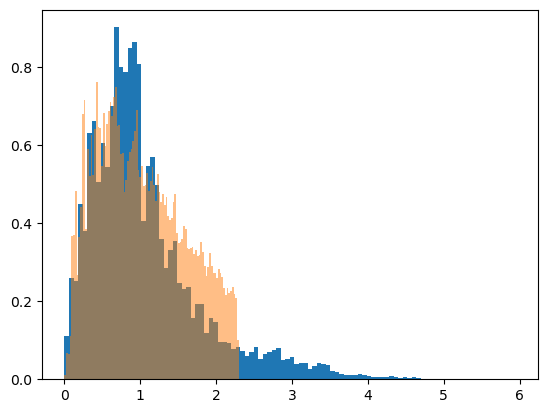

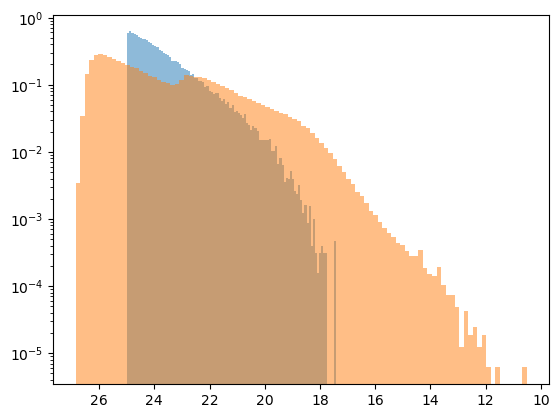

In [76]:
fig, axs = plt.subplots()

axs.hist(tcat["photoz"], bins=100, density=True);
axs.hist(d["Z"], density=True, bins=100, alpha=0.5)

fig, axs = plt.subplots()

axs.hist(tcat["mag_i_dered"], bins=100, log=True, density=True, alpha=0.5);
axs.hist(d["TMAG"][:1000000, 2], density=True, bins=100, alpha=0.5)
axs.xaxis.set_inverted(True)

In [100]:
%%time

rac, decc = hpgeom.pixel_to_angle(nside, pix)
wcs = galsim.FitsWCS(info["image_path"], hdu=1)

new_ra, new_dec, new_x, new_y = project_to_tile(
    d["TRA"],
    d["TDEC"],
    rac,
    decc,
    wcs,
)

CPU times: user 2.87 s, sys: 2.77 s, total: 5.65 s
Wall time: 5.58 s


In [101]:
tmsk = (
    (new_x >= 0.5)
    & (new_x <= 10000.5)
    & (new_y >= 0.5)
    & (new_y <= 10000.5)
) 
np.sum(tmsk)

173039

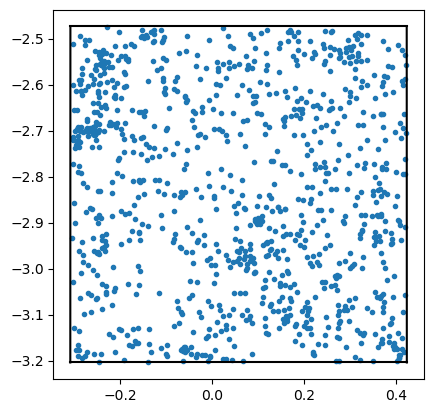

In [102]:
fig, axs = plt.subplots()

axs.set_aspect("equal")
axs.plot(new_ra[tmsk][0:1000], new_dec[tmsk][0:1000], ".")

xv = np.array([1, 1, 10000, 10000])
yv = np.array([1, 10000, 10000, 1])

rav, decv = wcs.xyToradec(xv, yv, units="degrees")

for i in range(rav.shape[0]):
    ip1 = (i+1) % rav.shape[0]
    axs.plot(
        [rav[i], rav[ip1]],
        [decv[i], decv[ip1]],
        "-k",
    )
        

(0.5, 10000.5)

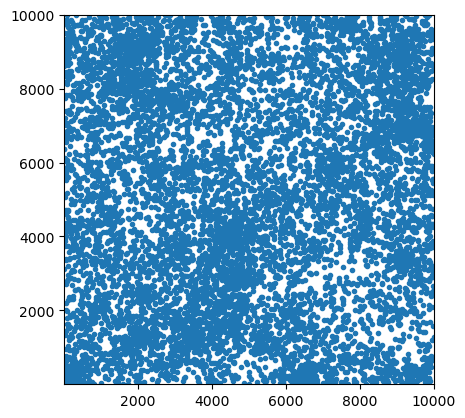

In [103]:
fig, axs = plt.subplots()

axs.set_aspect("equal")
axs.plot(new_x[tmsk][0:10000], new_y[tmsk][0:10000], ".")
axs.set_xlim(0.5, 1e4+0.5)
axs.set_ylim(0.5, 1e4+0.5)

In [104]:
from scipy.spatial import cKDTree

In [176]:
tdata = np.zeros((int(np.sum(tmsk)), 3))
tdata[:, 0] = d["TMAG"][tmsk, 1]  # r-band
tdata[:, 1] = d["TMAG"][tmsk, 0] - d["TMAG"][tmsk, 2]  # g-i color
# tdata[:, 2] = d["TMAG"][tmsk, 2] - d["TMAG"][tmsk, 3] # i-z color
tdata[:, 2] = d["Z"][tmsk] * 10

In [177]:
tree = cKDTree(tdata)

In [185]:
cmsk = tcat["photoz"] < 2.3
nk = 1000

cx = np.zeros((int(np.sum(cmsk)), 3))
cx[:, 0] = tcat["mag_r_dered"][cmsk]
cx[:, 1] = tcat["mag_g_dered"][cmsk] - tcat["mag_i_dered"][cmsk]
# cx[:, 2] = tcat["mag_i_dered"] - tcat["mag_z_dered"]
cx[:, 2] = tcat["photoz"][cmsk] * 10
dd, ii = tree.query(cx, k=nk)

In [186]:
np.unique(ii[:, 0:nk]).shape, np.sum(cmsk)

((132190,), 157246)

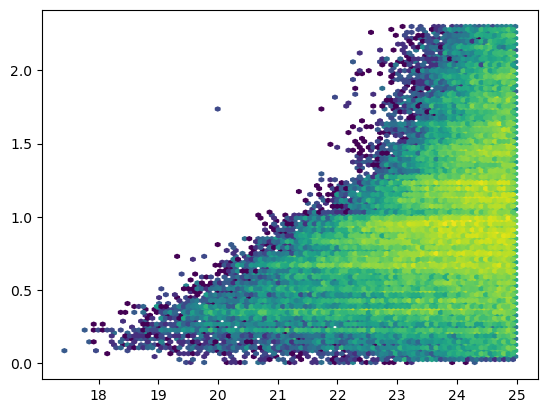

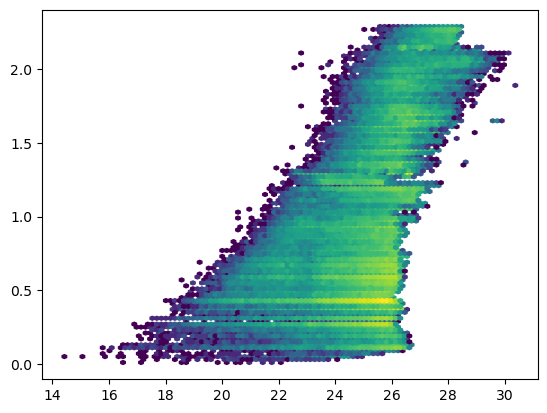

In [198]:
fig, axs = plt.subplots()

axs.hexbin(tcat[cmsk]["mag_i_dered"], tcat[cmsk]["photoz"], bins="log")

fig, axs = plt.subplots()

axs.hexbin(d[tmsk]["TMAG"][:, 2], d[tmsk]["Z"], bins="log")

In [194]:
axs.hexbin?

Signature:
axs.hexbin(
    x,
    y,
    C=None,
    gridsize=100,
    bins=None,
    xscale='linear',
    yscale='linear',
    extent=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    edgecolors='face',
    reduce_C_function=<function mean at 0x7f22681164b0>,
    mincnt=None,
    marginals=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Make a 2D hexagonal binning plot of points *x*, *y*.

If *C* is *None*, the value of the hexagon is determined by the number
of points in the hexagon. Otherwise, *C* specifies values at the
coordinate (x[i], y[i]). For each hexagon, these values are reduced
using *reduce_C_function*.

Parameters
----------
x, y : array-like
    The data positions. *x* and *y* must be of the same length.

C : array-like, optional
    If given, these values are accumulated in the bins. Otherwise,
    every point has a value of 1. Must be of the same length as *x*
    and *y*.

gridsize : int or (int, int), 